# Кластеризация датасета диагностики рака шейки матки с помощью k-means при использовании Метода Главных Компонент (PCA)

## О датасете

Ссылка на датасет: https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification
Датасет содержит список факторов риска рака шейки матки, ведущих к биопсии.

Описание полей:

* Age - Возраст
* Number of sexual partners - кол-во половых партнеров
* First sexual intercourse - первый половой опыт (в каком возрасте был)
* Num of pregnancies - число беременностей
* Smokes - курит ли пациент
* Smokes (years) - сколько лет курит, если курильщик
* Smokes (packs/year) - сколько пачек в год выкуривает, если курильщик
* Hormonal Contraceptives - использование гормональных контрацептивов
* Hormonal Contraceptives (years) - сколько лет пациент пользуется гормональными контрацептивами
* IUD - использование внутриматочной спирали ВМС
* IUD (years) - сколько лет используется ВМС
* STDs - ЗППП
* Далее идет набор полей с префиксом STDs, различные показатели диагностики ЗППП (тип заболевания, дата обследования и т.д.)
* Dx:Cancer - наличие рака
* Dx:CIN - наличие дисплазии шейки матки
* Dx:HPV - наличие вируса папилломы
* Dx - подтвержденный диагноз
* Hinselmann - тест на хроническую сердечную недостаточность
* Schiller - тест Шиллера на наличие патологий в матке
* Citology - цитологическое исследование матки на наличие патологий
* Biopsy - исследование на наличие биопсии

In [22]:
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
%matplotlib inline

## Исследование датасета

In [23]:
train = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [24]:
print(train.shape)

(858, 36)


Прежде чем мы сможем применить PCA, мы должны убедиться, что каждая переменная закодирована числом, и провести поиск потенциальных проблемных или нулевых значений.

In [25]:
print(train.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [26]:
for i in range(1,28):
    train.iloc[:,i]=pd.to_numeric(train.iloc[:,i], errors='coerce')
print(train.dtypes)

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

Поскольку каждая переменная теперь либо с плавающей запятой, либо - целое число, мы можем работать над запуском PCA. Однако мы также должны проверить нулевые значения.

In [27]:
train.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## Использование PCA при неполных данных

Прежде чем применять более элегантное решение, можно сначала попробовать запустить PCA, используя только переменные без нулевых значений, а затем сравнить результаты.

In [28]:
train2 = train[train.columns[28:37]]
train2.reset_index(drop=True, inplace=True)
train3= train[["Age"]]
train3.reset_index(drop=True, inplace=True)
train4=train[["STDs: Number of diagnosis"]]
train4.reset_index(drop=True, inplace=True)
frames=[train2,train3,train4]
first_PCA = pd.concat(frames, axis=1)
first_PCA.head()

,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,STDs: Number of diagnosis
0,0,0,0,0,0,0,0,0,18,0
1,0,0,0,0,0,0,0,0,15,0
2,0,0,0,0,0,0,0,0,34,0
3,1,0,1,0,0,0,0,0,52,0
4,0,0,0,0,0,0,0,0,46,0


Мы применим PCA с 6 компонентами к полученному набору данных.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(first_PCA)
pca_output = pca.transform(first_PCA)
ps = pd.DataFrame(pca_output)
ps

,0,1,2,3,4,5
0,-8.820905,-0.115237,-0.063649,-0.007620,-0.026157,0.002439
1,-11.820868,-0.104960,-0.066636,-0.000485,-0.030340,0.003743
2,7.178898,-0.170050,-0.047721,-0.045676,-0.003846,-0.004519
3,25.182257,-0.054164,-0.171325,0.958673,-0.099339,-0.446758
4,19.178749,-0.211160,-0.035774,-0.074218,0.012887,-0.009737
...,...,...,...,...,...,...
853,7.178898,-0.170050,-0.047721,-0.045676,-0.003846,-0.004519
854,5.178922,-0.163199,-0.049712,-0.040919,-0.006635,-0.003649
855,-1.821428,0.136333,-0.125257,0.043260,0.924604,-0.077380
856,6.178910,-0.166624,-0.048716,-0.043298,-0.005241,-0.004084


Чтобы увидеть, сколько вариаций фиксирует каждый компонент, мы можем использовать объясненный коэффициент дисперсии.

In [30]:
print(pca.explained_variance_ratio_)

[9.94555514e-01 2.12570027e-03 1.22138795e-03 7.27405233e-04
 5.56854274e-04 3.08699692e-04]


Таким образом, в первом компоненте фиксируется очень большое количество вариаций. Это, вероятно, связано с подавляющим влиянием возраста на риск рака шейки матки и скрининг (согласно источнику, 50% диагнозов рака шейки матки приходится на женщин в возрасте 35-54 лет).
 Возраст — единственная непрерывная переменная, которую мы смогли сохранить. Чтобы визуализировать это явление, мы можем построить результирующую диаграмму рассеяния по первым двум основным компонентам.

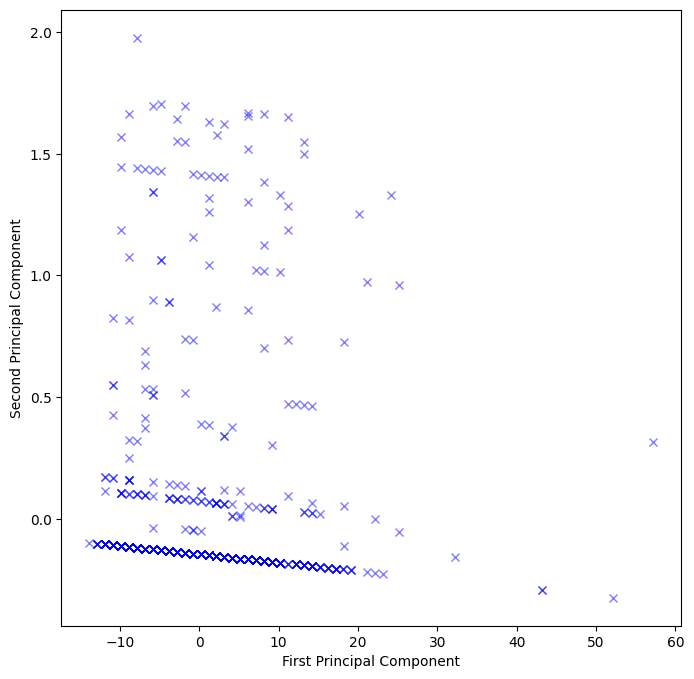

In [31]:
two_comp = pd.DataFrame(ps[[0,1]])

fig = plt.figure(figsize=(8,8))
plt.plot(two_comp[0], two_comp[1], 'x', markersize=6, color='blue', alpha=0.5)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Для дальнейшего понимания мы можем выполнить кластеризацию K-средних, чтобы увидеть, аккуратно ли данные сортируются по возрастным группам.

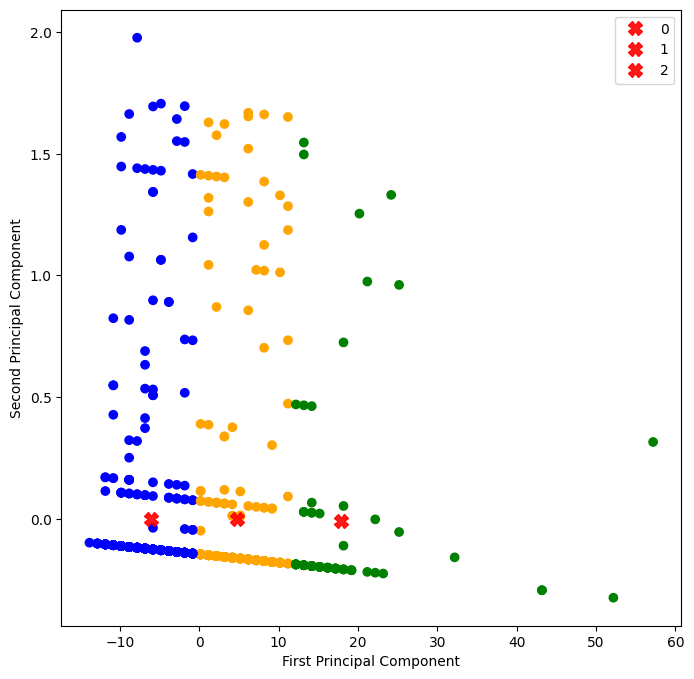

In [32]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3,random_state=42).fit(two_comp)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(two_comp)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','green']
colored = [colors[k] for k in c_preds]

plt.scatter(two_comp[0],two_comp[1],  color = colored)
for i,c in enumerate(centers):
    plt.plot(c[0], c[1], 'X', markersize=10, color='red', alpha=0.9, label=''+str(i))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

Эта кластеризация убедительно подтверждает мнение о том, что в этом неполном наборе данных возраст объясняет наибольшее количество вариаций факторов риска рака шейки матки для биопсии. Кластеры аккуратно разделены на основе первого основного компонента, который фиксирует большую часть вариаций данных. Теперь мы можем проверить, насколько точно эти кластеры соответствуют возрасту.

In [33]:
first_PCA['cluster']=c_preds
first_PCA.head(10)

,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,STDs: Number of diagnosis,cluster
0,0,0,0,0,0,0,0,0,18,0,1
1,0,0,0,0,0,0,0,0,15,0,1
2,0,0,0,0,0,0,0,0,34,0,0
3,1,0,1,0,0,0,0,0,52,0,2
4,0,0,0,0,0,0,0,0,46,0,2
5,0,0,0,0,0,0,0,0,42,0,2
6,0,0,0,0,1,1,0,1,51,0,2
7,0,0,0,0,0,0,0,0,26,0,1
8,1,0,1,1,0,0,0,0,45,0,2
9,0,0,0,0,0,0,0,0,44,0,2


Анализ показывает, что те, кто попадает в возрастной диапазон 40 лет и старше, попадают в кластер 2, а более молодые женщины попадают в кластеры 0 или 1. Чтобы проверить эту гипотезу, мы можем построить график зависимости возраста от кластера.

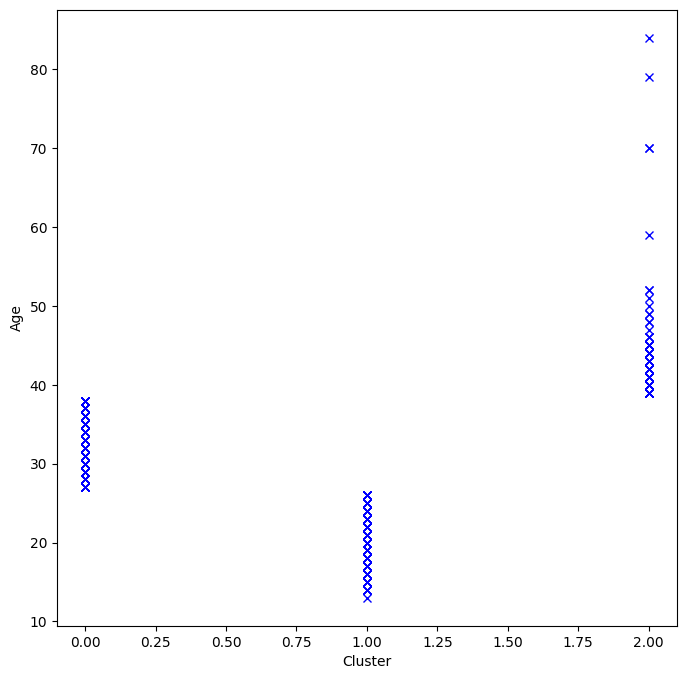

In [34]:
fig = plt.figure(figsize=(8,8))
plt.plot(first_PCA['cluster'], first_PCA['Age'], 'x', markersize=6, color='blue')

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

Теперь, когда мы запустили PCA для неполного подмножества данных и наблюдали влияние возраста, мы можем сравнить это с данными с включенными отсутствующими столбцами и дополненными значениями.

In [35]:
train['Number of sexual partners'].fillna(train['Number of sexual partners'].median(), inplace=True)
train['First sexual intercourse'].fillna(train['First sexual intercourse'].median(), inplace=True)
train['Num of pregnancies'].fillna(train['Num of pregnancies'].median(), inplace=True)
train['Smokes (years)'].fillna(train['Smokes (years)'].median(), inplace=True)
train['Smokes (packs/year)'].fillna(train['Smokes (packs/year)'].median(), inplace=True)
train['Hormonal Contraceptives (years)'].fillna(train['Hormonal Contraceptives (years)'].median(), inplace=True)
train['STDs (number)'].fillna(train['STDs (number)'].median(), inplace=True)
train['STDs: Time since first diagnosis'].fillna(train['STDs: Time since first diagnosis'].median(), inplace=True)
train['STDs: Time since last diagnosis'].fillna(train['STDs: Time since last diagnosis'].median(), inplace=True)
train['IUD (years)'].fillna(train['IUD (years)'].median(), inplace=True)

#Discrete variable imputation (without population estimates)
train['STDs:condylomatosis'].fillna(train['STDs:condylomatosis'].median(), inplace=True)
train['STDs:cervical condylomatosis'].fillna(train['STDs:cervical condylomatosis'].median(), inplace=True)
train['STDs:vaginal condylomatosis'].fillna(train['STDs:vaginal condylomatosis'].median(), inplace=True)
train['STDs:vulvo-perineal condylomatosis'].fillna(train['STDs:vulvo-perineal condylomatosis'].median(), inplace=True)
train['STDs:syphilis'].fillna(train['STDs:syphilis'].median(), inplace=True)
train['STDs:molluscum contagiosum'].fillna(train['STDs:molluscum contagiosum'].median(), inplace=True)
train['STDs'].fillna(train['STDs'].median(), inplace=True)
train['STDs:AIDS'].fillna(train['STDs:AIDS'].median(), inplace=True)
train['STDs:HIV'].fillna(train['STDs:HIV'].median(), inplace=True)

In [36]:
s = int(.136*train.shape[0])
smokes = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(smokes)
train['Smokes'].fillna(pd.Series(smokes), axis=0, inplace=True)

s = int(.103*train.shape[0])
iud = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(iud)
train['IUD'].fillna(pd.Series(iud), axis=0, inplace=True)

s = int(.229*train.shape[0])
hc = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(hc)
train['Hormonal Contraceptives'].fillna(pd.Series(hc), axis=0, inplace=True)

s = int(.399*train.shape[0])
hpv = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(hpv)
train['STDs:HPV'].fillna(pd.Series(hpv), axis=0, inplace=True)

s = int(.034*train.shape[0])
hep = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(hep)
train['STDs:Hepatitis B'].fillna(pd.Series(hep), axis=0, inplace=True)

s = int(.159*train.shape[0])
gen = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(gen)
train['STDs:genital herpes'].fillna(pd.Series(gen), axis=0, inplace=True)

s = int(.044*train.shape[0])
pid = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(pid)
train['STDs:pelvic inflammatory disease'].fillna(pd.Series(pid), axis=0, inplace=True)

In [37]:
train.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


## PCA с полноценным датасетом

In [38]:
pca = PCA(n_components=6)
pca.fit(train)
pca_output2 = pca.transform(train)
ps2 = pd.DataFrame(pca_output2)
ps2

,0,1,2,3,4,5
0,-9.353467,0.259572,-0.588640,-1.112956,-0.124661,-0.541657
1,-12.430060,0.533891,-0.075706,-1.172732,-0.123548,0.214851
2,6.313840,-2.168986,-2.892732,-0.949351,-0.558322,-0.719056
3,30.846275,43.868663,-2.226400,3.805817,-3.373864,-1.310280
4,20.804198,-4.558056,9.635602,3.009071,-0.744807,-0.789146
...,...,...,...,...,...,...
853,6.385698,-2.192040,-3.104580,-0.178281,-0.364724,-1.036316
854,5.766304,-2.480070,4.765537,2.427364,-0.199664,-0.167811
855,-2.441429,-1.067157,-1.720871,0.276621,-0.071944,-0.314310
856,6.320189,-3.112402,-3.979059,5.191801,0.718289,-0.084134


In [39]:
print(pca.explained_variance_ratio_)

[0.5889387  0.14456827 0.08997483 0.05063321 0.04768259 0.02384819]


Первая главная компонента теперь объясняет значительно меньшую вариацию, чем раньше. Мы можем создать график, чтобы визуализировать распространение данных.

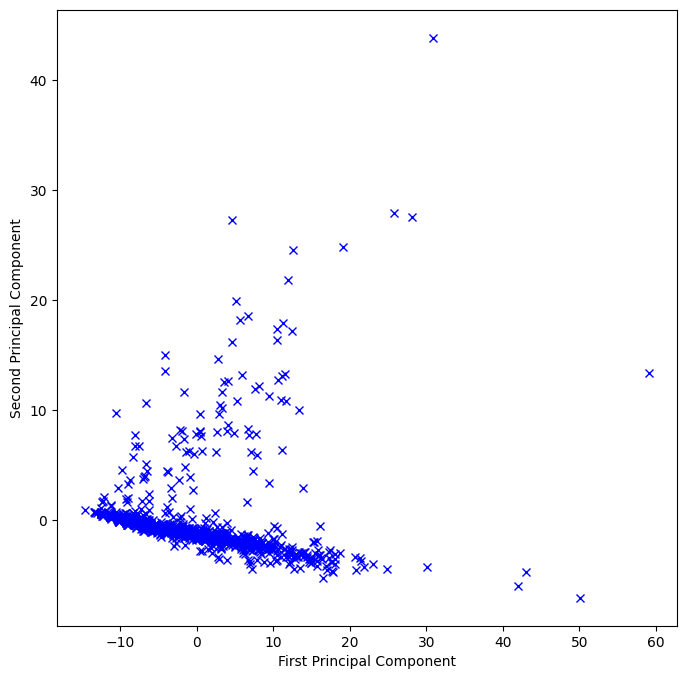

In [40]:
two_comp = pd.DataFrame(ps2[[0,1]])
fig = plt.figure(figsize=(8,8))
plt.plot(two_comp[0], two_comp[1], 'x', markersize=6, color='blue')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

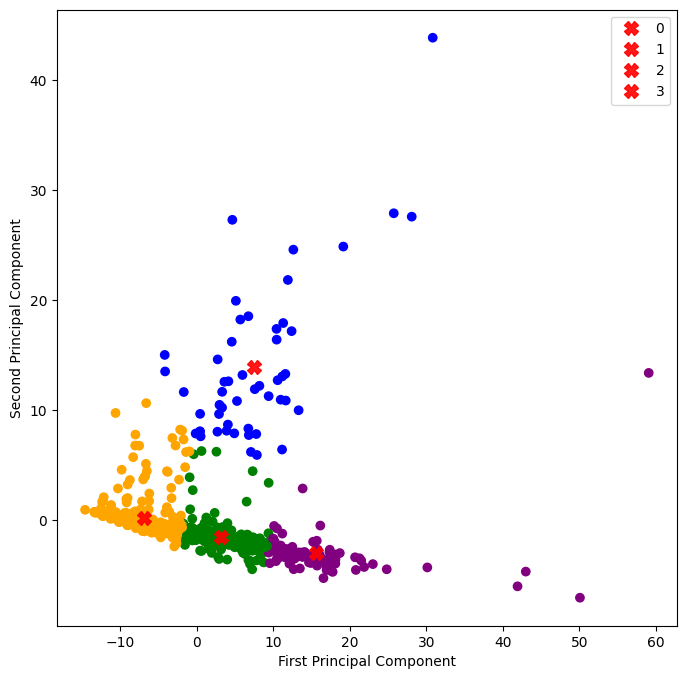

In [41]:
tocluster = pd.DataFrame(ps2[[0,1]])
clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','green','purple']
colored = [colors[k] for k in c_preds]

plt.scatter(two_comp[0],two_comp[1],  color = colored)
for i,c in enumerate(centers):
    plt.plot(c[0], c[1], 'X', markersize=10, color='red', alpha=0.9, label=''+str(i))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

Первый главный компонент теперь оказывает меньшее влияние на сформированные группы, чем раньше. Чтобы проверить, оказывает ли возраст большое влияние на классификацию рисков, мы можем еще раз построить график зависимости возраста от кластера.

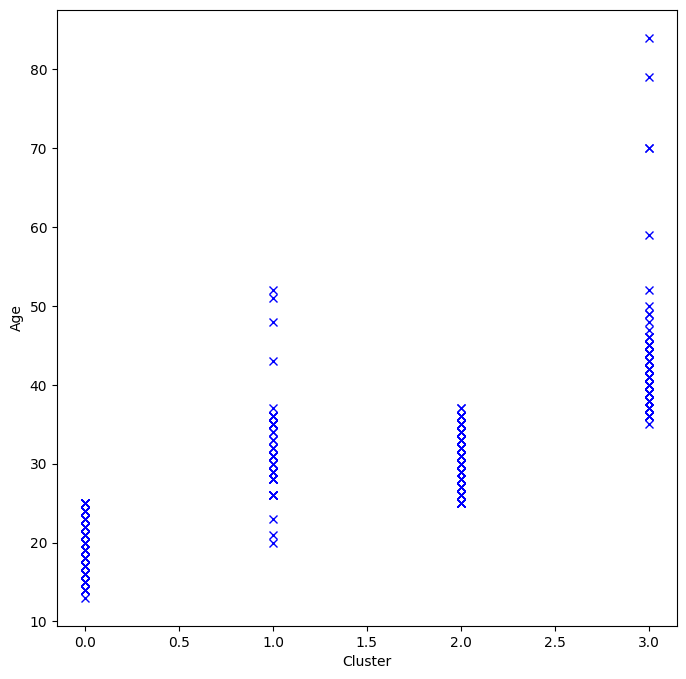

In [42]:
train['cluster']=c_preds

fig = plt.figure(figsize=(8,8))
plt.plot(train['cluster'], train['Age'], 'x', markersize=6, color='blue')

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

Возраст остается важным фактором, особенно среди более молодых женщин, которые находятся в одном кластере. Женщины моложе 20 лет практически не подвержены риску рака шейки матки. Однако между возрастами наблюдается значительно большее смешение, чем при первом прогоне PCA; заполнение пропущенных значений улучшило качество анализа, который можно выполнить для этого набора данных.